<a href="https://colab.research.google.com/github/Jenat1210/Artificial/blob/main/Regionaldrug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Confusion Matrix:
[[638   0]
 [101  11]]

Classification Report:
              precision    recall  f1-score   support

       False       0.86      1.00      0.93       638
        True       1.00      0.10      0.18       112

    accuracy                           0.87       750
   macro avg       0.93      0.55      0.55       750
weighted avg       0.88      0.87      0.81       750

Safe


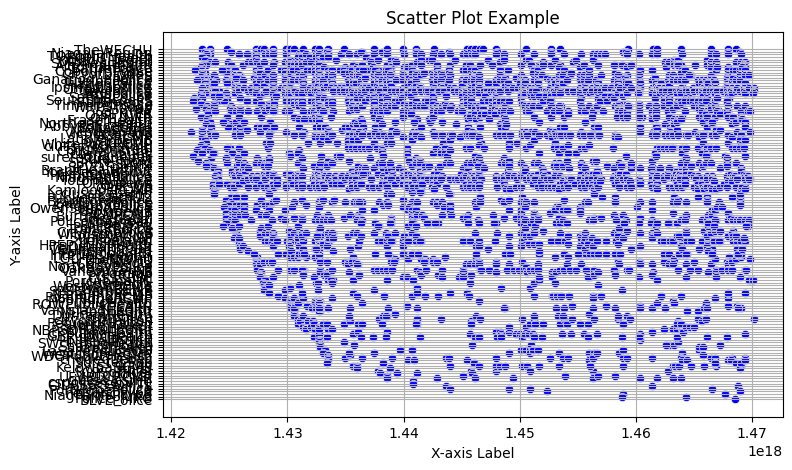

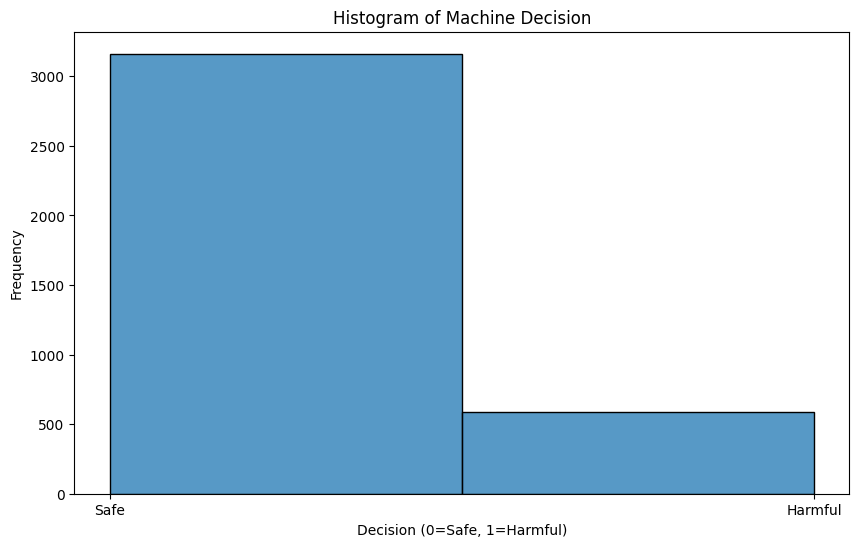

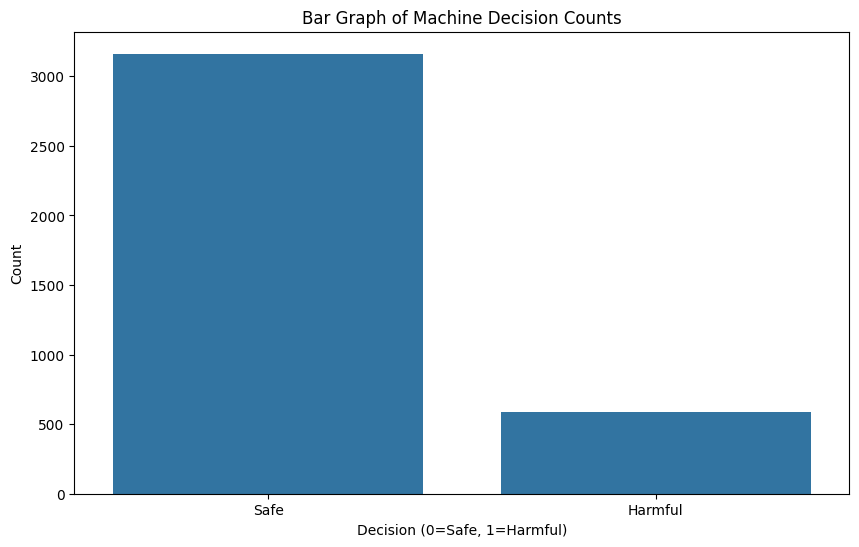

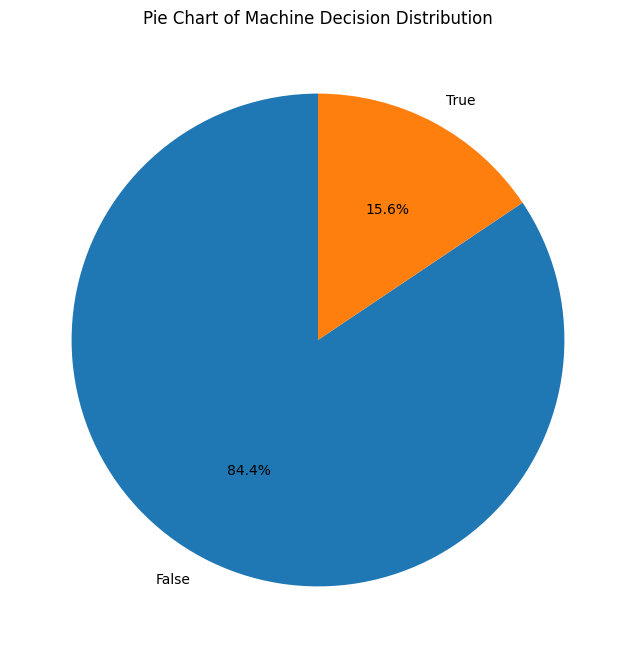

Naive Bayes Confusion Matrix:
[[638   0]
 [101  11]]

Naive Bayes Classification Report:
              precision    recall  f1-score   support

       False       0.86      1.00      0.93       638
        True       1.00      0.10      0.18       112

    accuracy                           0.87       750
   macro avg       0.93      0.55      0.55       750
weighted avg       0.88      0.87      0.81       750

Decision Tree Confusion Matrix:
[[594  44]
 [ 30  82]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.93      0.94       638
        True       0.65      0.73      0.69       112

    accuracy                           0.90       750
   macro avg       0.80      0.83      0.82       750
weighted avg       0.91      0.90      0.90       750

SVM Confusion Matrix:
[[636   2]
 [ 57  55]]

SVM Classification Report:
              precision    recall  f1-score   support

       False       0.92      1.00   

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords
nltk.download('stopwords')

# Load your dataset
# Assuming the dataset has two columns: 'text' (the social media post) and 'label' (0 for safe, 1 for harmful)
data = pd.read_excel('/content/expofinal_dataset.xlsx')

# Preprocess the data
def preprocess_text(text):
    # Convert to lower case
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

data['mechine_label'] = data['text'].apply(preprocess_text)

# Split the data into training and testing sets
X = data['mechine_label']
y = data['machine_decision']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Function to predict new posts
def predict_new_post(post):
    processed_post = preprocess_text(post)
    post_vec = vectorizer.transform([processed_post])
    prediction = model.predict(post_vec)
    return 'Harmful' if prediction[0] == 1 else 'Safe'

# Example usage
new_post = "I just tried this new drug and it was amazing!"
print(predict_new_post(new_post))

#Data Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='id', y='username', color='blue')
plt.title('Scatter Plot Example')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.grid()
plt.show()



# Histogram of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['machine_decision'], bins=2, kde=False)
plt.title('Histogram of Machine Decision')
plt.xlabel('Decision (0=Safe, 1=Harmful)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Safe', 'Harmful'])
plt.show()

# Bar Graph of the target variable counts
plt.figure(figsize=(10, 6))
sns.countplot(x='machine_decision', data=data)
plt.title('Bar Graph of Machine Decision Counts')
plt.xlabel('Decision (0=Safe, 1=Harmful)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Safe', 'Harmful'])
plt.show()

# Pie Chart of the target variable
plt.figure(figsize=(8, 8))
data['machine_decision'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Machine Decision Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

# Train and evaluate Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_y_pred = nb_model.predict(X_test_vec)
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, nb_y_pred))
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_y_pred))

# Train and evaluate Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_vec, y_train)
dt_y_pred = dt_model.predict(X_test_vec)
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, dt_y_pred))
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_y_pred))

# Train and evaluate Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X_train_vec, y_train)
svm_y_pred = svm_model.predict(X_test_vec)
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_y_pred))
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_y_pred))

# Train and evaluate Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_vec, y_train)
lr_y_pred = lr_model.predict(X_test_vec)
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, lr_y_pred))
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_y_pred))

# Train and evaluate Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_vec, y_train)
gb_y_pred = gb_model.predict(X_test_vec)
print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, gb_y_pred))
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, gb_y_pred))